In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def expectation(t_real, s, n, k_i, k, flag):
    diff = np.zeros(k_i)
    for i in range(s):
        if flag == 'uniform':
            distr = np.random.uniform(0, t_real, n)
        else:
            distr = np.random.exponential(t_real, n)
        t_est = np.zeros(k_i)
        for j in range(k_i):
            x_mean = np.average(np.power(distr, k[j], dtype=np.float128))
            t_est[j] = np.power((k[j] + 1) * x_mean, (1/k[j]), dtype=np.float128)
        diff += (t_est - t_real) ** 2
    diff /= n
    return diff

In [3]:
t_real = 1 # тетта
s = 100 # кол-во выборок
n = 1000 # членов в выборке
k_i = 1000 # степень максимального момента
k = np.linspace(1, k_i, k_i) # степени момента по порядку

In [4]:
uni = expectation(t_real, s, n, k_i, k, 'uniform')

In [5]:
expo = expectation(t_real, s, n, k_i, k, 'exponential')

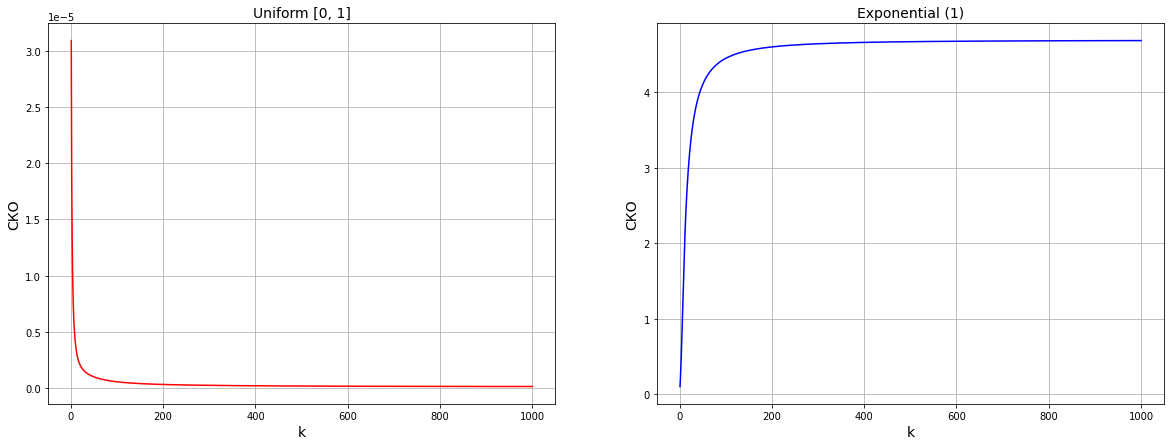

In [6]:
plt.figure(figsize=(20, 7))

plt.subplot(1, 2, 1)
plt.plot(k, uni, color='red')  
plt.title("Uniform [0, 1]", fontsize=14)
plt.xlabel("k", fontsize=14) 
plt.ylabel("СКО", fontsize=14)
plt.grid(True)        

plt.subplot(1, 2, 2)
plt.plot(k, expo, color='blue')  
plt.title("Exponential (1)", fontsize=14)
plt.xlabel("k", fontsize=14) 
plt.ylabel("СКО", fontsize=14)
plt.grid(True)